# Final Project Tutorial 

In [16]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [17]:
rcParams['figure.figsize'] = [10.,8]
fits_image_filename = fits.util.get_testdata_filepath('test0.fits')
hdul = fits.open ("/Users/carrottop/Desktop/image.fits")

In [19]:
data = hdul[0].data

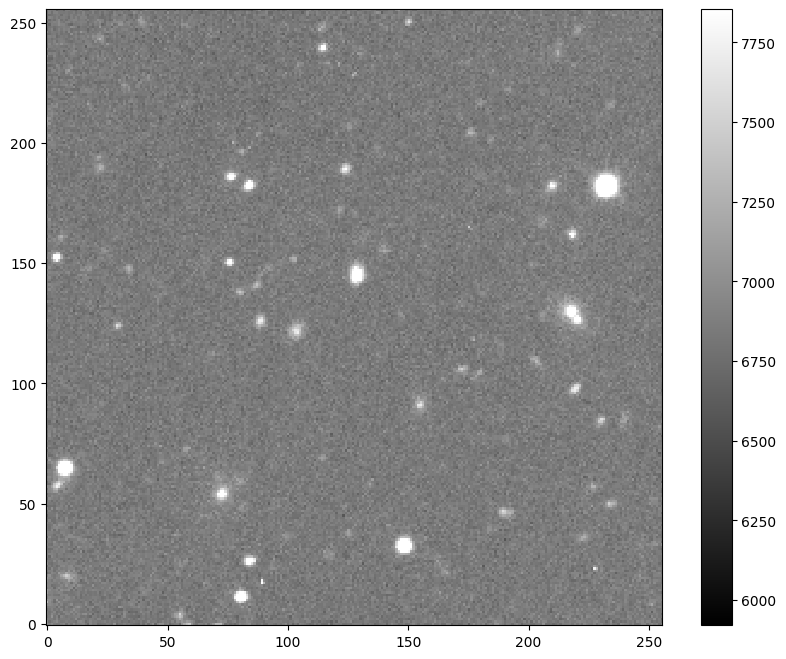

In [20]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation = "nearest", cmap = "gray", vmin = m - s, vmax = m+s, origin = "lower")
plt.colorbar()

In [22]:
bkg = sep.Background(data)

In [23]:
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


In [24]:
bkg_image = bkg.back()

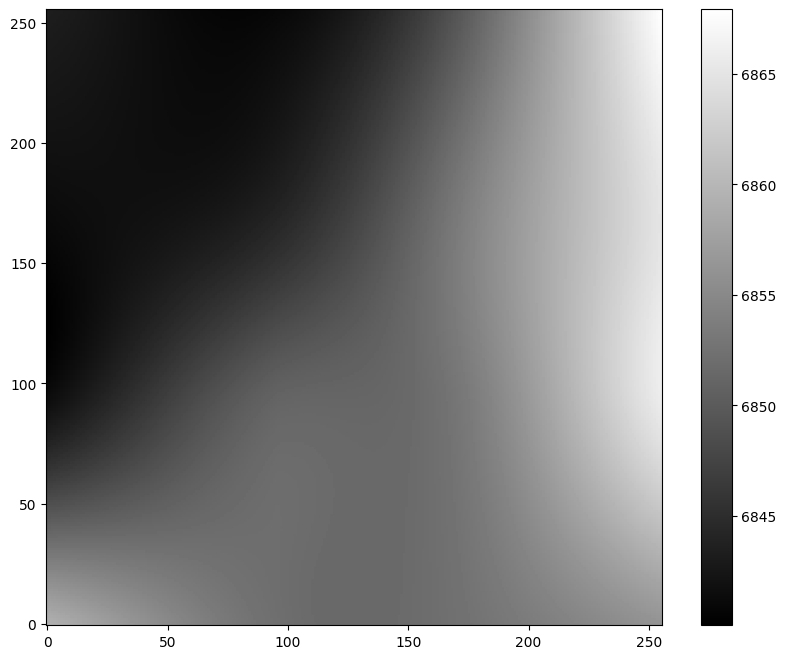

In [27]:
plt.imshow(bkg_image, interpolation= 'nearest', cmap='gray', origin='lower')
plt.colorbar();

In [30]:
bkg_rms = bkg.rms()

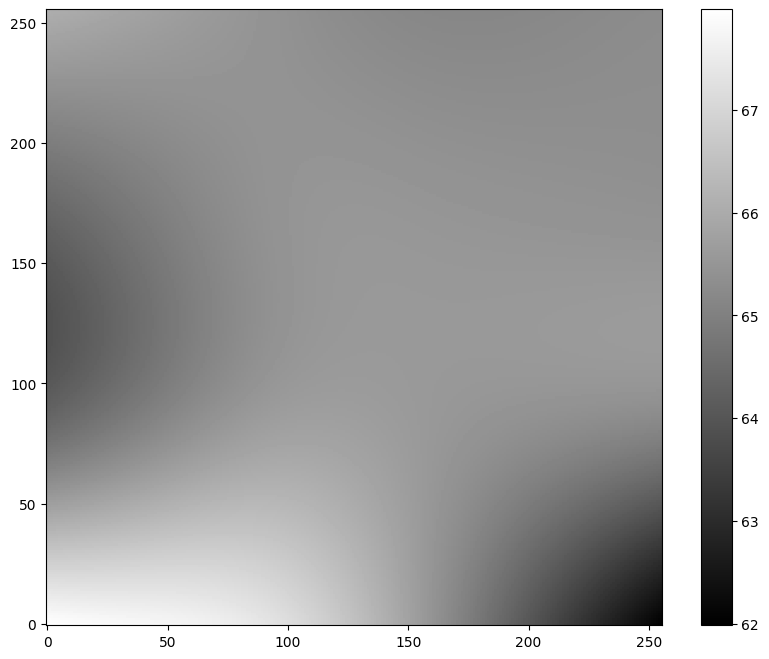

In [31]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [32]:
data_sub = data - bkg

In [33]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [34]:
len(objects)

68

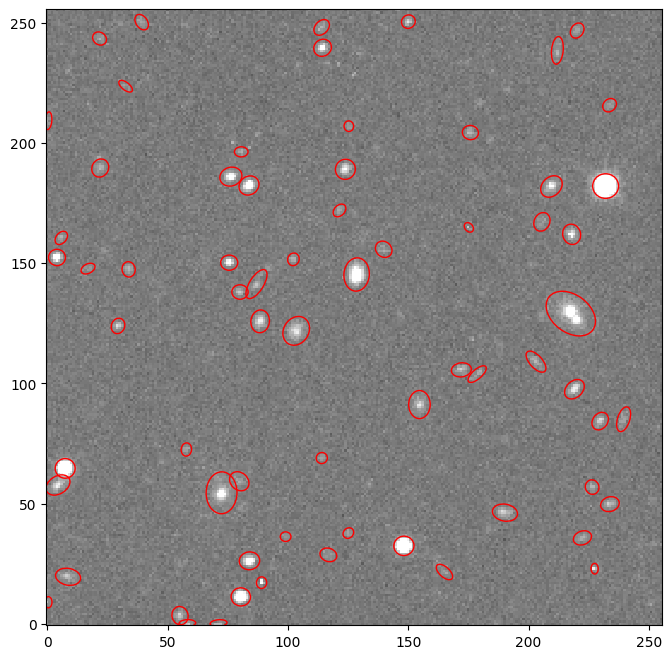

In [38]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [39]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [42]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)

In [43]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:F}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
